# Graphing Models

### Imports and Data

In [1]:
%%capture
import pandas as pd
from pandas import DataFrame
from pandas import read_csv as read
import seaborn as sns
import matplotlib.pyplot as plt

df_t_g = read('../outputs/general/test_general.csv')
df_i_g = read('../outputs/individual/test_individual.csv')
df_t_g = df_t_g[df_t_g['Model'] != 'Least Angle Regression']
df_i_g = df_i_g[df_i_g['Model'] != 'Least Angle Regression']

#### Graph Function

In [19]:
%matplotlib ipympl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

def create_boxplot(df:DataFrame, margin:int):
    # Create a figure and an Axes object
    fig, ax = plt.subplots(figsize=(14, 8))

    # Use the Axes object `ax` for the main plots
    g = sns.boxplot(x='MAE', y='Model', data=df, ax=ax, zorder=1, color="white", showfliers=False)
    sns.stripplot(x='MAE', y='Model', data=df, ax=ax, zorder=2, color='#1d95db', size=2, jitter=False, alpha=1)

    plt.subplots_adjust(left=0.18)

    top_six_models = df.groupby('Model').median().nsmallest(6, 'MAE').reset_index()['Model'].unique()
    df_mini = df[df['Model'].isin(top_six_models)]
    axins = inset_axes(ax, width="40%", height="55%", loc='upper right')

    ax.set_xlim(-0.06, df_mini['MAE'].max() + margin)

    abbreviations = {
        "K Neighbors Regressor": "KNN",
        "Random Forest Regressor":"RF",
        "Decision Tree Regressor":"DT",
        "Light Gradient Boosting Machine":"LGBM",
        "Extra Trees Regressor":"ET",
        "Gradient Boosting Regressor":"GB",
        "AdaBoost Regressor":"ADA",
        "Linear Regression":"LR"
    }

    df_mini = df_mini[df_mini['Model'].isin(top_six_models)].replace(abbreviations)

    sns.boxplot(x='MAE', y='Model', data=df_mini, ax=axins, zorder=1, color="white", showfliers=False).set_title('Top Six Models')
    sns.stripplot(x='MAE', y='Model', data=df_mini, ax=axins, zorder=2, color='#1d95db', size=2, jitter=False, alpha=1)

    for model in df_mini['Model'].unique():
        subset = df_mini[df_mini['Model'] == model]
        median = subset['MAE'].median()
        Q1 = subset['MAE'].quantile(0.25)
        Q3 = subset['MAE'].quantile(0.75)

        plt.scatter(median, model, color='#142a99', marker='D', s=20, zorder=3)
        plt.scatter(Q1,     model, color='#142a99', marker='s', s=15, zorder=3)
        plt.scatter(Q3,     model, color='#142a99', marker='s', s=15, zorder=3)

        padding = 0.03
        plt.text(median, model, f'{median:.2f}', size=10, color='black', verticalalignment='bottom', horizontalalignment='center')
        plt.text(Q1 - padding, model, f'{Q1:.2f}', size=10, color='black', verticalalignment='top', horizontalalignment='right')
        plt.text(Q3 + padding, model, f'{Q3:.2f}', size=10, color='black', verticalalignment='top', horizontalalignment='left')

    # Remove grid lines
    ax.grid(False)
    axins.grid(False)

    # Draw rectangle
    yticks = ax.get_yticks()
    rect_width = df_mini['MAE'].max() + 0.2  # Gets the max MAE value and adds padding
    rect_height = yticks[0] - yticks[5] - 0.8  # top y-tick - 6th (bottom) y-tick + padding
    # Specifies the starting point of the bottom left corner
    x_start = 0
    y_start = yticks[5] + 0.4
    rect = patches.Rectangle((x_start, y_start), rect_width, rect_height, linewidth=1.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)


#### Graphing

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_62444\761050040.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_six_models = df.groupby('Model').median().nsmallest(6, 'MAE').reset_index()['Model'].unique()


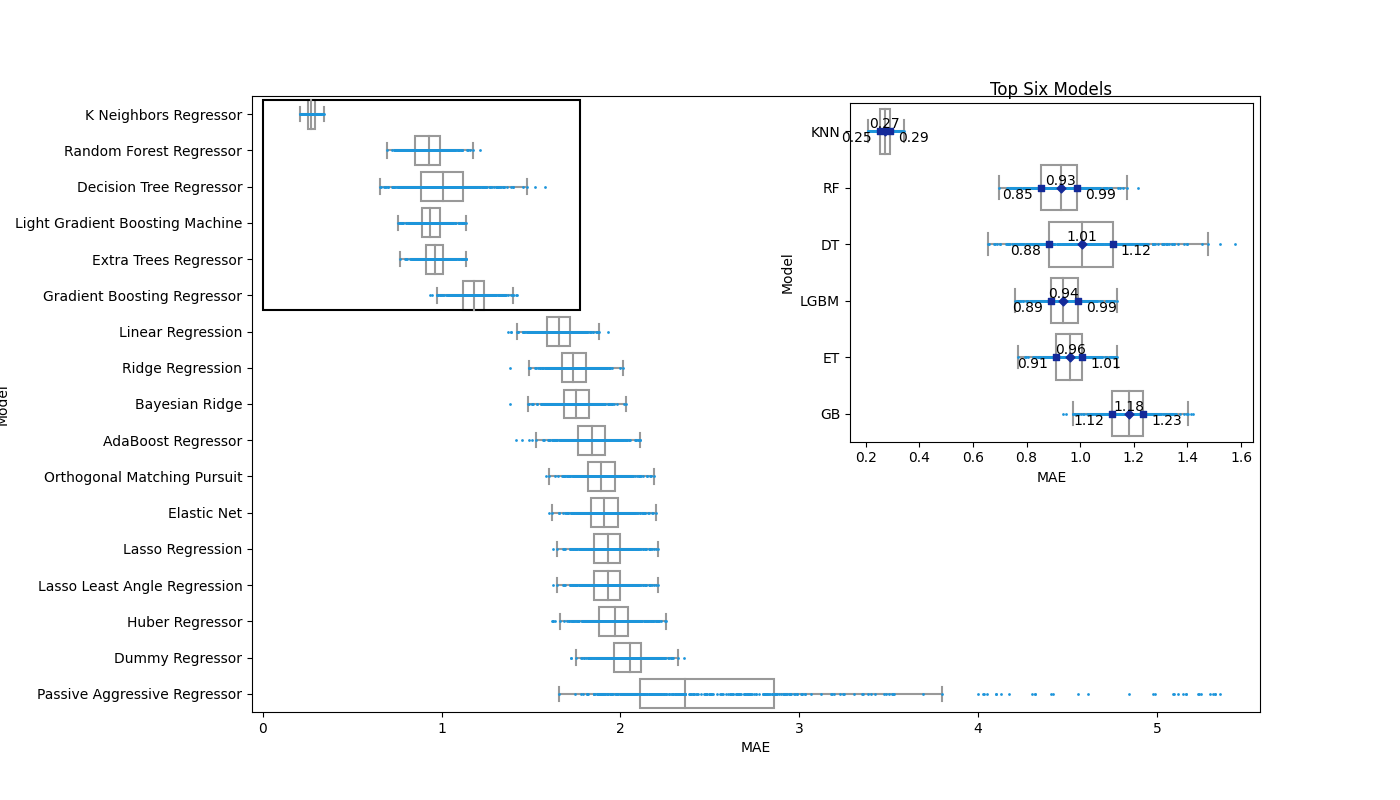

In [21]:
create_boxplot(df_t_g, 4)

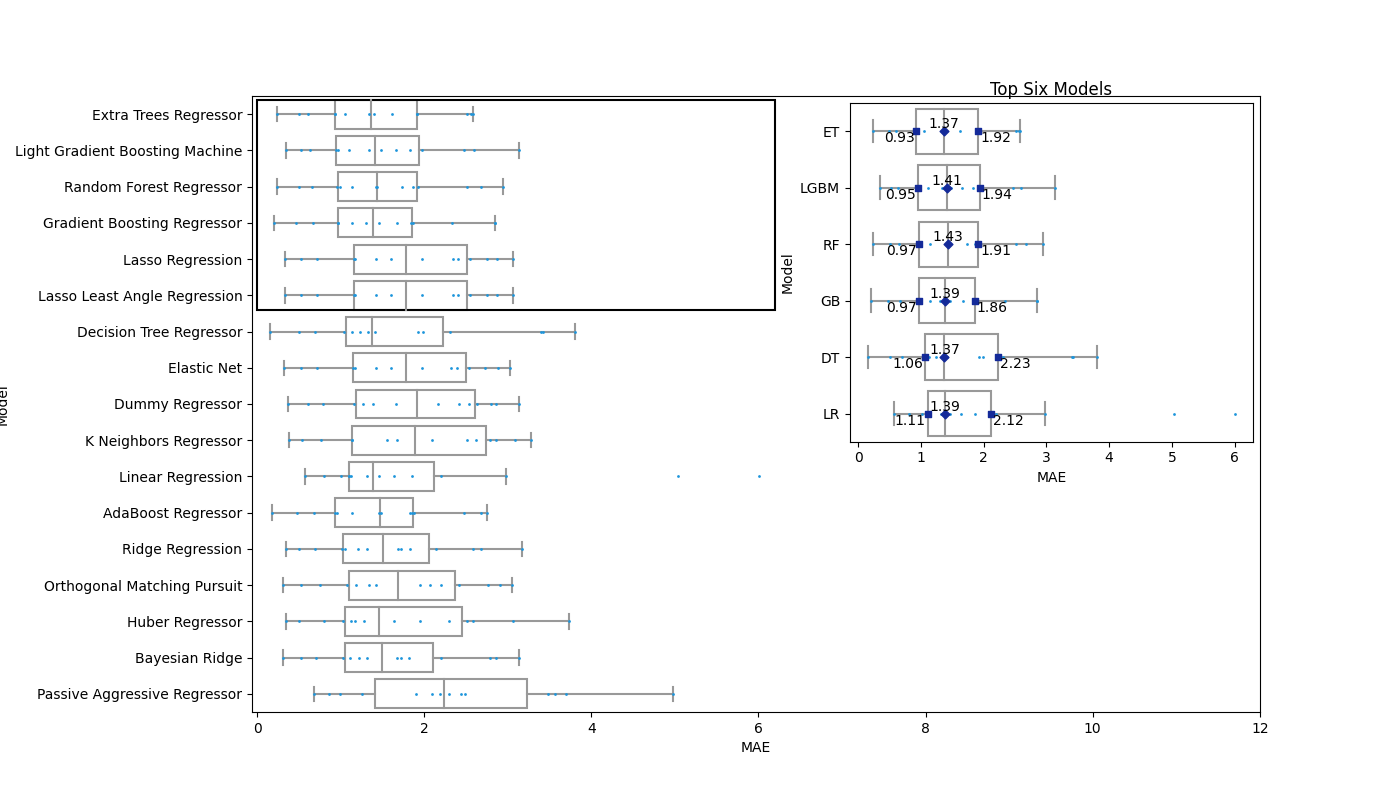

In [20]:
create_boxplot(df_i_g, 6)